In [4]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline
def nearest_value(array,value):
    idx=(np.abs(array-value)).argmin()
    return idx
df=pd.read_csv("OrganizedTables/HourlyLoadPerNode.csv",index_col=range(4))
dfp=pd.read_csv("OrganizedTables/LoadHighlightsPerNode.csv",index_col=range(2),header=range(2))

In [ ]:
year=int(raw_input("Yearly frecuency: "))
for index, k in enumerate(df.columns.tolist()):
    
    plt.figure(index,figsize=(10,7),dpi = 200)
    
    data1=[]
    for a in range(2016,2031,year):
        try: f=df.xs(a,level=0)[k]
        except ValueError: print "{0},{1},{2}".format(a,m,d)
        yy=[]
        for m in range(1,13):
            for d in range(1,32):
                try: yy.append(f.xs([m,d],level=[0,1]).mean())
                except KeyError: yy.append(0)
                
        
        color =np.random.rand(3)
        plt.plot( yy, c=color, alpha=0.7,label='{0}'.format(a))
    plt.xticks([0,90,180,270], ['January','May','July','October'], rotation='vertical')
    name='Yearly variation, mid escenary, in node {0}'.format(k)
    plt.ylabel('Load (MW)')
    plt.title(name)
    plt.grid()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

Hourly analysis of a load area. Given a load area, year and month, it will show a plot of the hourly demand every day of the month and another plot of the selected days: peak day, median day, average (closest to monthly average) day and a random day
Load area: 01-hermosillo
Year: 2016
Month: 01
Hourly frequency:  2
Daily frecuency: 2
PeakDay            21.000000
PeakValue         693.576444
MonthlyAverage    580.968444
Name: (2016, 1), dtype: float64


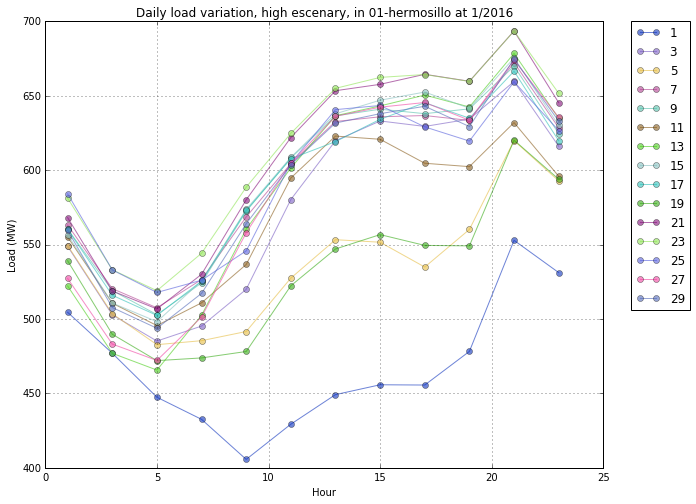

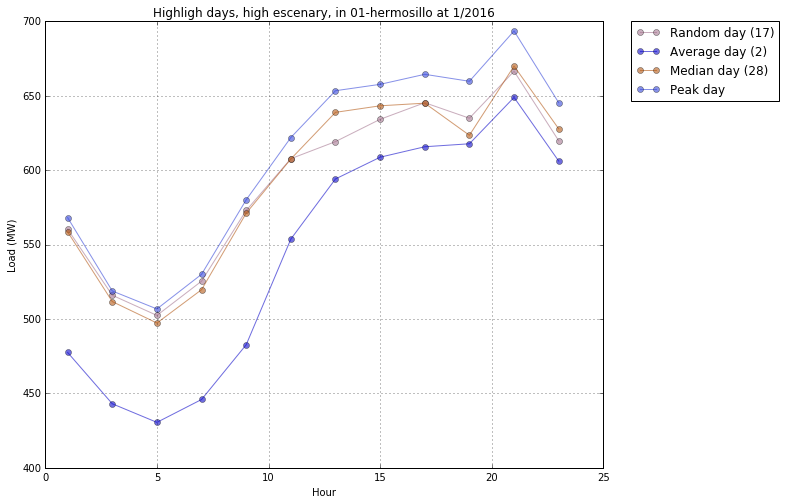

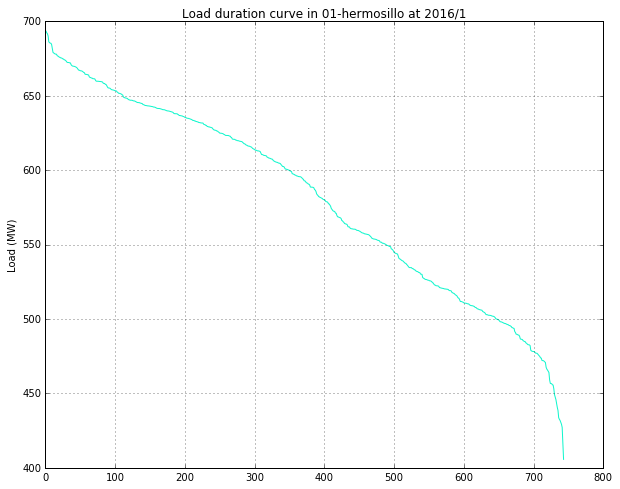

In [19]:
print 'Hourly analysis of a load area. Given a load area, year and month, it will show a plot of the hourly demand every day of the month and another plot of the selected days: peak day, median day, average (closest to monthly average) day and a random day'

k=raw_input("Load area: ")
a=int(raw_input("Year: "))
m=int(raw_input("Month: "))
res=int(raw_input("Hourly frequency:  "))
day=int(raw_input("Daily frecuency: "))


#daily load variation plot
%matplotlib inline
plt.figure(1,figsize=(10,8),dpi = 200)

for d in range(1,len(df.xs([a,m,1],level=[0,1,3])[k].index.tolist()),day):
    yy=[]
    for h in range(1,25):
        yy.append(df.xs([a,m,d,h])[k])
    plt.plot(range(1,25,res),[yy[i] for i in range(0,24,res)],c=np.random.rand(3),alpha=.6,label='{0}'.format(d),marker='o')
print dfp.xs([a, m])[k]
plt.ylabel('Load (MW)')
plt.xlabel('Hour')
plt.grid()
plt.title('Daily load variation, mid escenary, in {0} at {1}/{2}'.format(k,m,a))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


#highlights calculation
zz=[]
for d in df.xs([a,m,1],level=[0,1,3])[k].index.tolist():
    zz.append(df.xs([a,m,d],level=range(3))[k].mean())
aleatorio=random.choice(zz)
indx_ale=zz.index(aleatorio)
indx_mean= nearest_value(np.array(zz),dfp.xs([a,m])[k,'MonthlyAverage'])
mean = zz[indx_mean]
if len(zz)%2 ==1:
    median = np.median(np.array(zz))
    indx_median = zz.index(median)
else:
    n=np.random.randint(len(zz))
    median = np.median(zz[-n])
    indx_median = zz.index(median)
    if indx_median>= n:
        indx_median= indx_median+1
        
#highlights load variation plot

plt.figure(2,figsize=(10,8),dpi = 200)
plt.plot(range(1,25,res),[df.xs([a,m,indx_ale],level=range(3))[k].tolist()[i] for i in range(0,24,res)],c=np.random.rand(3),alpha=.6,label="Random day ({0})".format(indx_ale),marker='o')
plt.plot(range(1,25,res),[df.xs([a,m,indx_mean],level=range(3))[k].tolist()[i] for i in range(0,24,res)],c=np.random.rand(3),alpha=.6,label="Average day ({0})".format(indx_mean),marker='o')
plt.plot(range(1,25,res),[df.xs([a,m,indx_median],level=range(3))[k].tolist()[i] for i in range(0,24,res)],c=np.random.rand(3),alpha=.6,label="Median day ({0})".format(indx_median),marker='o')
plt.plot(range(1,25,res),[df.xs([a,m,dfp.xs([a,m])[k,'PeakDay']],level=range(3))[k].tolist()[i] for i in range(0,24,res)],c=np.random.rand(3),alpha=.6,label="Peak day",marker='o')
plt.xlabel('Hour')
plt.ylabel('Load (MW)')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Highlight days, mid escenary, in {0} at {1}/{2}'.format(k,m,a))
plt.show()
#monthly peak order plot

df1=df.xs([a,m])[k].copy()
df1=df1.sort_values(ascending=False)
plt.figure(3,figsize=[10,8],dpi=200)
plt.title("Load duration curve in {0} at {1}/{2}".format(k,a,m))
plt.ylabel("Load (MW)")
plt.grid()
plt.plot(df1.tolist(),c=np.random.rand(3))
plt.show()